# Linear Models
- $\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$
- $\hat{y}$ is the __predicted value__.
- ${w}$ is the vector of coefficients: $(w_1, ..., w_p)$, expressed as __coef___.
- $w0$, is the __intercept___.

### [Ordinary Least Squares](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) (OLS)
- minimizes the __residual sum of squares__ between the predicted and observed target values.
- complexity: if X is a matrix of `(nsamples, nfeatures)`, OLS has a cost of $O(n_{\text{samples}} n_{\text{features}}^2)$.

In [2]:
from sklearn import linear_model as LM
reg = LM.LinearRegression()

In [3]:
reg.fit([[0,0],[1,1],[2,2]],
        [0,1,2])

LinearRegression()

In [4]:
reg.coef_

array([0.5, 0.5])

- OLS coefficient estimates rely on the __independence of the features__.
- When features are correlated, OLS becomes __sensitive to random errors__ in the observed targets - producing unacceptable variances.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model as LM
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# diabetes dataset
X,y = datasets.load_diabetes(return_X_y=True)

# use only one feature
X = X[:, np.newaxis, 2]

In [7]:
# split into training & test sets
Xtrain,Xtest = X[:-20], X[-20:]

In [8]:
# split target data
ytrain,ytest = y[:-20], y[-20:]

In [9]:
# create & train regression model
regr = LM.LinearRegression()
regr.fit(Xtrain,ytrain)

LinearRegression()

In [10]:
# predict from test data & return results
ypred = regr.predict(Xtest)

print('Coefficients:\t',   regr.coef_)
print('Mean sqd error:\t', mean_squared_error(ytest,ypred))
print('r2 score:\t',       r2_score(          ytest,ypred))

Coefficients:	 [938.23786125]
Mean sqd error:	 2548.07239872597
r2 score:	 0.47257544798227147


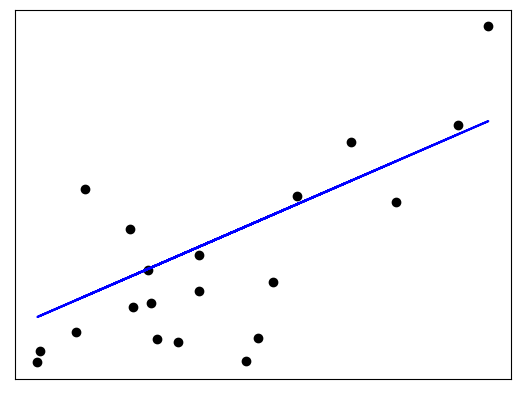

(([], []), ([], []), None)

In [11]:
# scatterplot test data; lineplot predicted data
plt.scatter(Xtest,ytest,color='black')
plt.plot(   Xtest,ypred,color='blue')
plt.xticks(()), plt.yticks(()), plt.show() 

### Least Squares (Non-Negative)
- [Wikipedia](https://en.wikipedia.org/wiki/Non-negative_least_squares)
- Useful when modeling physical or naturally non-negative quantities. The estimator accepts a boolean __postive__ parameter. 

In [12]:
# generate random data. 200 samples, 50 features/sample.
np.random.seed(42)
nsamps,nfeats = 200,50
X = np.random.randn(nsamps,nfeats)
print(X)

[[ 0.49671415 -0.1382643   0.64768854 ...  1.05712223  0.34361829
  -1.76304016]
 [ 0.32408397 -0.38508228 -0.676922   ...  0.26105527  0.00511346
  -0.23458713]
 [-1.41537074 -0.42064532 -0.34271452 ... -1.32045661  0.52194157
   0.29698467]
 ...
 [-0.63919353 -0.15627634  0.68677407 ... -0.27027037  1.61286837
   0.94661831]
 [ 0.93465471  0.36992561 -1.11732701 ... -0.61403816 -0.19807363
   1.3006254 ]
 [ 0.86780546  0.22740508 -0.88984477 ... -0.70531672  0.49576557
   0.64438845]]


In [13]:
# coefficients
true_coefs = 3*np.random.randn(nfeats)
true_coefs[true_coefs<0] = 0
print(true_coefs)

[0.         0.         0.         0.33125414 3.59153559 0.
 3.00246149 0.         0.         2.45578386 2.76580913 2.55422981
 0.         0.         2.46896578 0.12462552 0.         1.37495382
 0.         5.38357455 4.63452439 1.81229228 4.08302011 0.19437405
 2.29631248 4.43316089 0.73649605 0.         0.         0.
 2.47026955 2.83690028 1.5130952  0.         0.         0.
 0.         0.         1.85566907 5.95702923 0.37058761 0.
 0.         0.3731543  0.         0.36059568 1.35243701 0.62905819
 1.3726258  1.30124283]


In [14]:
# set y to dot-product of X & coefficients
# add normally distributed noise
y =  np.dot(X,true_coefs)
y += 5*np.random.normal(size=(nsamps,))

In [15]:
# split data. split_size = % of data to include in test split.
from sklearn.model_selection import train_test_split as TTS

Xtrain,Xtest,ytrain,ytest = TTS(X,y,test_size=0.5)

In [16]:
# fit model using both OLS & NNLS - compare R2 scores
from sklearn.linear_model import LinearRegression as LR

regr_ols = LR()
regr_nn  = LR(positive=True)

ypred_ols = regr_ols.fit(Xtrain,ytrain).predict(Xtest)
ypred_nn  = regr_nn.fit(Xtrain,ytrain).predict(Xtest)

print('r2 score (OLS):\t\t',  r2_score(ytest,ypred_ols))
print('r2 score (NNLS):\t', r2_score(ytest,ypred_nn))

r2 score (OLS):		 0.7436926291700354
r2 score (NNLS):	 0.8225220806196525


Text(0, 0.5, 'NNLS coeffs')

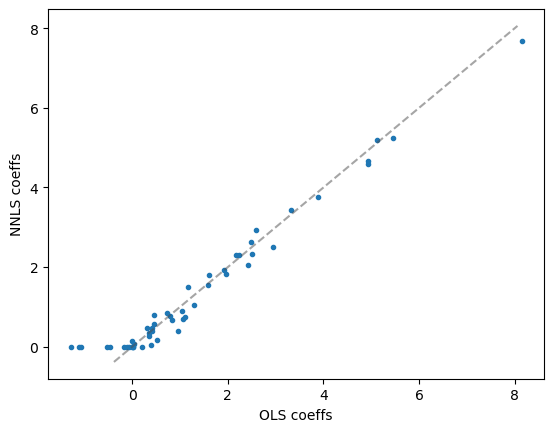

In [17]:
# plot regression coeffs between OLS & NNLS
# note how NNLS constraint shrinks some coeffs to zero
# NNLS inherently yield sparse results.

fix,ax = plt.subplots()
ax.plot(regr_ols.coef_, regr_nn.coef_, marker='.', linewidth=0)

minx,maxx = ax.get_xlim()
miny,maxy = ax.get_ylim()
low, high = max(minx,miny), min(maxx,maxy)

ax.plot([low,high],[low,high], ls='--', c='0.3', alpha=0.5)

ax.set_xlabel('OLS coeffs'); ax.set_ylabel('NNLS coeffs')

### [Ridge regression](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)
- Addresses OLS weaknesses by imposing a __shrinkage penalty__ (controlled by $\alpha \geq 0$).
- Larger values of $\alpha\$ make the coefficients more resistant to collinearity (when one feature is highly linearly correleated with another).

In [18]:
from sklearn import linear_model as LM
regr = LM.Ridge(alpha=0.5)

regr.fit([[0,0],[0,0],[1,1]],  [0.0, 0.1, 1.0])

print("Coefficients:\t", regr.coef_)
print('Intercept:\t',    regr.intercept_)

Coefficients:	 [0.34545455 0.34545455]
Intercept:	 0.13636363636363638


- Ridge has multiple __solver__ choices:

| Name          | Condition                      |
|---------------|------------------------------- |
| __auto__      | autochosen by Ridge            |
| __lbfgs__     | positive=True                  |
| __cholesky__  | X (input array) is not sparse. |
| __sparse_cg__ | otherwise                      |

### Example: plot Ridge coefficients vs regularization
- each plot color = different feature in coefficient vector
- demostrates how Ridge is useful when handling ill-conditioned (noisy) data.
- large alpha: regularization dominates the squared loss function - coeffs trend to zero.
- zero alpha (aka OLS): coefficients suffer from oscillation.
- tune $\alpha\$ to balance between the two.

In [19]:
# build 10x10 Hilbert matrix 
# (sq.matrix with entries as unit fractions)

X = 1.0/(np.arange(1,11) + np.arange(0,10)[:, np.newaxis])
print(X)

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0625     

In [20]:
y = np.ones(10); print(y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [21]:
# compute paths along alpha
alphas = np.logspace(-10,2,200)
coefs  = []
for a in alphas:
    ridge = LM.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)

print(alphas)

[1.00000000e-10 1.14895100e-10 1.32008840e-10 1.51671689e-10
 1.74263339e-10 2.00220037e-10 2.30043012e-10 2.64308149e-10
 3.03677112e-10 3.48910121e-10 4.00880633e-10 4.60592204e-10
 5.29197874e-10 6.08022426e-10 6.98587975e-10 8.02643352e-10
 9.22197882e-10 1.05956018e-09 1.21738273e-09 1.39871310e-09
 1.60705282e-09 1.84642494e-09 2.12145178e-09 2.43744415e-09
 2.80050389e-09 3.21764175e-09 3.69691271e-09 4.24757155e-09
 4.88025158e-09 5.60716994e-09 6.44236351e-09 7.40196000e-09
 8.50448934e-09 9.77124154e-09 1.12266777e-08 1.28989026e-08
 1.48202071e-08 1.70276917e-08 1.95639834e-08 2.24780583e-08
 2.58261876e-08 2.96730241e-08 3.40928507e-08 3.91710149e-08
 4.50055768e-08 5.17092024e-08 5.94113398e-08 6.82607183e-08
 7.84282206e-08 9.01101825e-08 1.03532184e-07 1.18953407e-07
 1.36671636e-07 1.57029012e-07 1.80418641e-07 2.07292178e-07
 2.38168555e-07 2.73644000e-07 3.14403547e-07 3.61234270e-07
 4.15040476e-07 4.76861170e-07 5.47890118e-07 6.29498899e-07
 7.23263390e-07 8.309941

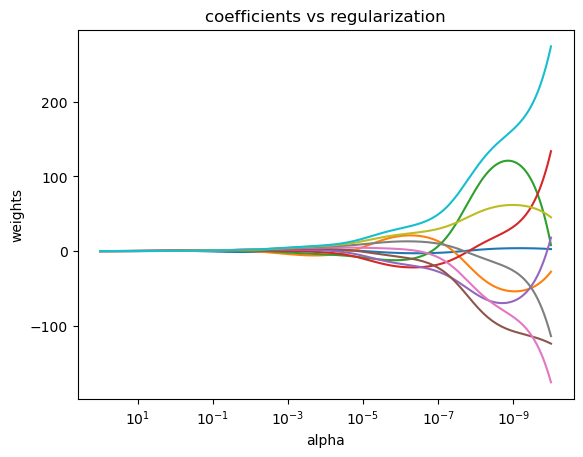

In [22]:
# plot
ax = plt.gca() # get current axes
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('coefficients vs regularization')
plt.axis('tight')
plt.show()

### [Ridge Classification](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier)
- Converts binary targets to `{-1,+1}`, then treats problem as a regression task. 
- Predicted class corresponds to the prediction sign.
- Multiclass classification: the problem is treated as a multi-output regression with the predicted class being the highest output.
- Can be __much faster__ than Logistic Regression for problems with large numbers of classes - it has to compute the projection matrix ($(X^T X)^{-1} X^T$) only once.
- Same cost complexity as OLS.

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifier
X, y = load_breast_cancer(return_X_y=True)
clf = RidgeClassifier().fit(X, y)
clf.score(X, y)

0.9595782073813708

### [Ridge Regression with $\alpha$ Cross Validation](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV)
- Default mode: leave-one-out (LOO) CV

In [24]:
import numpy as np
from sklearn import linear_model as LM
reg = LM.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg.alpha_

0.01

### [Lasso Regression](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)
- Useful for building models with __sparse coefficients__.
- Commonly cited for use cases similar to __compressed sensing__.
- Adds a regularization term to a linear model. The function to minimize is $\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$
- $\alpha$ is a constant
- $||w||_1$ is the $\ell_1$ norm.
- scikit-learn implementation uses __coordinate descent__ as the fitting algorithm. See __Least Angle Regression__ for an alternative approach.

In [25]:
regr = LM.Lasso(alpha=0.1)
regr.fit([[0,0], [1,1]], 
         [0,1])
regr.predict([[1,1]])

array([0.8])

### [Example: L1-based models for sparse signals](https://scikit-learn.org/dev/auto_examples/linear_model/plot_lasso_and_elasticnet.html#sphx-glr-auto-examples-linear-model-plot-lasso-and-elasticnet-py)
- Lasso vs ARD vs Elastic-Net
- compare performance using R2 score, fitting time & coefficient sparsity

In [26]:
# generate dataset with #samples < #features
# y = linear combo with alternating sinusoids
# 10 lowest of 100 frequencies in X are used to generate y.
# results in high-dimensional sparse feature space

import numpy as np

rng = np.random.RandomState(0)
n_samples     = 50
n_features    = 100 
n_informative = 10
time_step     = np.linspace(-2, 2, n_samples)
freqs         = 2 * np.pi * np.sort(rng.rand(n_features)) / 0.01
X             = np.zeros((n_samples, n_features))

for i in range(n_features):
    X[:, i] = np.sin(freqs[i] * time_step)

idx                       = np.arange(n_features)
true_coef                 = (-1) ** idx * np.exp(-idx / 10)
true_coef[n_informative:] = 0  # sparsify coef
y                         = np.dot(X, true_coef)

In [27]:
# some informative features has close frequencies 
# to induce anti-correlations?
freqs[:n_informative]

array([ 2.9502547 , 11.8059798 , 12.63394388, 12.70359377, 24.62241605,
       37.84077985, 40.30506066, 44.63327171, 54.74495357, 59.02456369])

In [28]:
# introduce a random phase with random_sample
# introduce gaussian noise with np.random.normal
# to features & target

for i in range(n_features):
    X[:, i]  = np.sin(freqs[i] * time_step + 2 * (rng.random_sample() - 0.5))
    X[:, i] += 0.2 * rng.normal(0, 1, n_samples)

y += 0.2 * rng.normal(0, 1, n_samples)

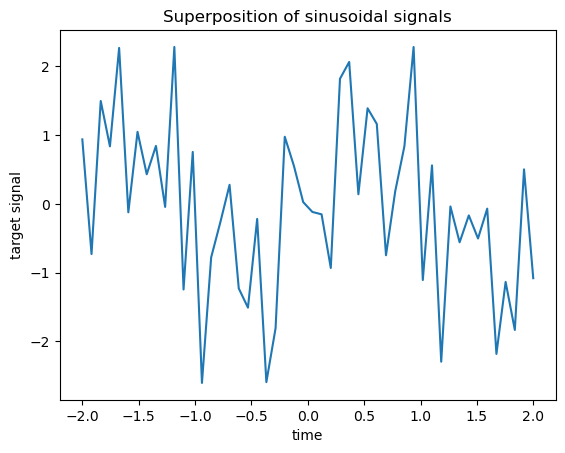

In [29]:
# visualize the target
import matplotlib.pyplot as plt

plt.plot(time_step, y)
plt.ylabel("target signal")
plt.xlabel("time")
_ = plt.title("Superposition of sinusoidal signals")

In [30]:
# split into training & test sets

from sklearn.model_selection import train_test_split as TTS

X_train, X_test, y_train, y_test = TTS(X, y, 
                                       test_size=0.5, 
                                       shuffle=False)


In [31]:
# Lasso first.

from time import time
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

t0    = time()
lasso = Lasso(alpha=0.14).fit(X_train, y_train)
print(f"Lasso fit done in {(time() - t0):.3f}s")

y_pred_lasso   = lasso.predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso r^2 on test data : {r2_score_lasso:.3f}")

Lasso fit done in 0.002s
Lasso r^2 on test data : 0.480


In [32]:
# ARD next.
# ARD = bayes version of Lasso. suitable option when signal noise = Gaussian.

from sklearn.linear_model import ARDRegression as ARDR

t0           = time()
ard          = ARDR().fit(X_train, y_train)
y_pred_ard   = ard.predict(X_test)
r2_score_ard = r2_score(y_test, y_pred_ard)

print(f"ARD fit done in {(time() - t0):.3f}s")
print(f"ARD r^2 on test data : {r2_score_ard:.3f}")

ARD fit done in 0.087s
ARD r^2 on test data : 0.543


In [33]:
# ElasticNet last
# EN = middle ground - it combines L1 & L2 penalties.
# when l1_ratio = 0, penalty is purely L2 (equiv to Ridge)
# when l1_ratio = 1, penalty is purely L1 (equiv to Lasso)
# when 0 < l1_ratio < 1, penalty is combination of L1 & l2

from sklearn.linear_model import ElasticNet as EN

t0            = time()
enet          = EN(alpha=0.08, l1_ratio=0.5).fit(X_train, y_train)
y_pred_enet   = enet.predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)

print(f"ElasticNet fit done in {(time() - t0):.3f}s")
print(f"ElasticNet r^2 on test data : {r2_score_enet:.3f}")

ElasticNet fit done in 0.004s
ElasticNet r^2 on test data : 0.636


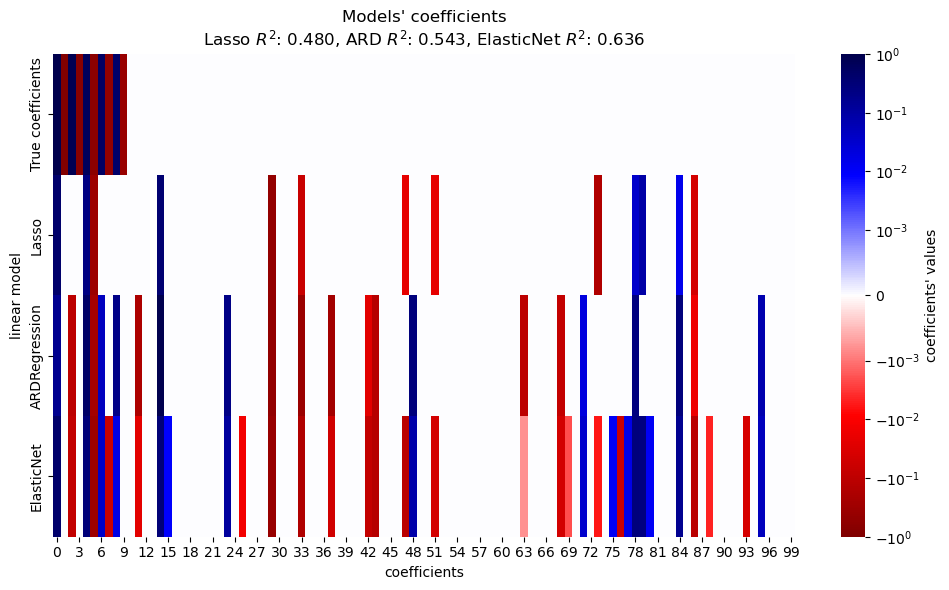

In [34]:
# use a heatmap to see sparsity of true & estimated coefficients
# for each model type.

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import SymLogNorm

df = pd.DataFrame(
    {
        "True coefficients": true_coef,
        "Lasso": lasso.coef_,
        "ARDRegression": ard.coef_,
        "ElasticNet": enet.coef_,
    }
)

plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    df.T,
    norm=SymLogNorm(linthresh=10e-4, vmin=-1, vmax=1),
    cbar_kws={"label": "coefficients' values"},
    cmap="seismic_r",
)
plt.ylabel("linear model")
plt.xlabel("coefficients")
plt.title(
    f"Models' coefficients\nLasso $R^2$: {r2_score_lasso:.3f}, "
    f"ARD $R^2$: {r2_score_ard:.3f}, "
    f"ElasticNet $R^2$: {r2_score_enet:.3f}"
)
plt.tight_layout()

#### conclusions
- Lasso: recovers sparse data effectively but does not perform well with highly correlated features. Indeed, if several correlated features contribute to the target, Lasso would end up selecting a single one of them. In the case of sparse yet non-correlated features, a Lasso model would be more suitable.

- ElasticNet introduces sparsity on the coefficients and shrinks their values to zero. Thus, in the presence of correlated features that contribute to the target, the model is still able to reduce their weights without setting them exactly to zero. This results in a less sparse model than a pure Lasso and may capture non-predictive features as well.

- ARDRegression is better when handling gaussian noise, but is still unable to handle correlated features and requires a larger amount of time due to fitting a prior.

### [Example: compressive sensing (tomography reconstruction)](https://scikit-learn.org/dev/auto_examples/applications/plot_tomography_l1_reconstruction.html#sphx-glr-auto-examples-applications-plot-tomography-l1-reconstruction-py)

- Image reconstruction from a set of parallel projections acquired along different angles, during computed tomography (CT).
- For simplicity consider a sparse image, where only pixels on the boundary of objects have a non-zero value.
- This could correspond, for example, to cellular material. Most images are sparse in a different basis, such as [Haar wavelets](https://en.wikipedia.org/wiki/Haar_wavelet).
- Only l/7 projections are acquired, so it's necessary to use prior information available on the sample (its sparsity): this is an example of compressive sensing.
- CT is a linear transform. In addition to the data-fidelity term corresponding to a linear regression, we penalize the L1 norm of the image to account for its sparsity.
- The resulting optimization problem is called the Lasso. We use the class Lasso, that uses the coordinate descent algorithm. This approach is more computationally efficient on a sparse matrix, than the projection operator used here.
- The reconstruction with L1 penalization gives a result with zero error (all pixels are successfully labeled with 0 or 1), even if noise is added.
- An L2 penalization (Ridge) returns a large number of labeling errors. Important artifacts are observed on the reconstructed image, contrary to the L1 penalization.
- Note the circular artifact separating the pixels in the corners, that have contributed to fewer projections than the central disk.

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, sparse
from sklearn.linear_model import Lasso, Ridge

def _weights(x, dx=1, orig=0):
    x       = np.ravel(x)
    floor_x = np.floor((x - orig) / dx).astype(np.int64)
    alpha   = (x - orig - floor_x * dx) / dx
    return np.hstack((floor_x, floor_x + 1)), np.hstack((1 - alpha, alpha))

In [36]:
def _generate_center_coordinates(l_x):
    X, Y   = np.mgrid[:l_x, :l_x].astype(np.float64)
    center = l_x / 2.0
    X     += 0.5 - center
    Y     += 0.5 - center
    return X, Y

In [37]:
# compute tomography design matrix.
# l_x (int): linear size of image array
# n_dir (int): #angles at which projections are acquired.
#
# returns p : sparse matrix of shape (n_dir l_x, l_x**2)

def build_projection_operator(l_x, n_dir):
    X, Y                            = _generate_center_coordinates(l_x)
    angles                          = np.linspace(0, np.pi, n_dir, endpoint=False)
    data_inds, weights, camera_inds = [], [], []

    data_unravel_indices = np.arange(l_x**2)
    data_unravel_indices = np.hstack((data_unravel_indices, data_unravel_indices))
    
    for i, angle in enumerate(angles):
        Xrot         = np.cos(angle) * X - np.sin(angle) * Y
        inds, w      = _weights(Xrot, dx=1, orig=X.min())
        mask         = np.logical_and(inds >= 0, inds < l_x)
        weights     += list(w[mask])
        camera_inds += list(inds[mask] + i * l_x)
        data_inds   += list(data_unravel_indices[mask])
    proj_operator    = sparse.coo_matrix((weights, (camera_inds, data_inds)))
    return proj_operator

In [38]:
def generate_synthetic_data():
    rs         = np.random.RandomState(0)
    n_pts      = 36
    x, y       = np.ogrid[0:l, 0:l]
    mask_outer = (x - l / 2.0) ** 2 + (y - l / 2.0) ** 2 < (l / 2.0) ** 2
    mask       = np.zeros((l, l))
    points     = l * rs.rand(2, n_pts)
    mask[(points[0]).astype(int), (points[1]).astype(int)] = 1
    mask       = ndimage.gaussian_filter(mask, sigma=l / n_pts)
    res        = np.logical_and(mask > mask.mean(), mask_outer)
    return np.logical_xor(res, ndimage.binary_erosion(res))


In [39]:
# Generate synthetic images, and projections
l             = 128
proj_operator = build_projection_operator(l, l // 7)
data          = generate_synthetic_data()
proj          = proj_operator @ data.ravel()[:, np.newaxis]
proj         += 0.15 * np.random.randn(*proj.shape)

In [40]:
# Reconstruction with L2 (Ridge) penalization
rgr_ridge = Ridge(alpha=0.2)
rgr_ridge.fit(proj_operator, proj.ravel())
rec_l2 = rgr_ridge.coef_.reshape(l, l)

In [41]:
# Reconstruction with L1 (Lasso) penalization
# optimal alpha found using cross validation (LassoCV)
rgr_lasso = Lasso(alpha=0.001)
rgr_lasso.fit(proj_operator, proj.ravel())
rec_l1 = rgr_lasso.coef_.reshape(l, l)

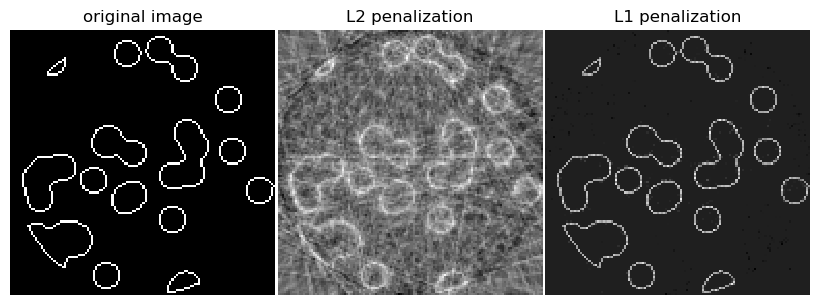

In [42]:
# plot
plt.figure(figsize=(8, 3.3))

plt.subplot(131)
plt.imshow(data, cmap=plt.cm.gray, interpolation="nearest")
plt.axis("off")
plt.title("original image")

plt.subplot(132)
plt.imshow(rec_l2, cmap=plt.cm.gray, interpolation="nearest")
plt.title("L2 penalization")
plt.axis("off")

plt.subplot(133)
plt.imshow(rec_l1, cmap=plt.cm.gray, interpolation="nearest")
plt.title("L1 penalization")
plt.axis("off")

plt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0, right=1)
plt.show()

### (TODO) [Example: linear model coefficient pitfalls](https://scikit-learn.org/dev/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py)

### [Lasso regularization](https://scikit-learn.org/dev/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html#sphx-glr-auto-examples-inspection-plot-linear-model-coefficient-interpretation-py)
- coefficient sparsity controlled by `alpha` parameter

### [Lasso regularization using CV](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV)
- Optimal for high-dimensional datasets with collinear features
- [LassoLarsCV](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.LassoLarsCV.html#sklearn.linear_model.LassoLarsCV) faster than LassoCV if #samples is much less than #features.

### LassoLars regularization using info criteria techniques
- [__Akeike info criterion (AIC)__](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjVkoL_3bjvAhWaHM0KHXa6DAAQFjACegQIAxAD&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FAkaike_information_criterion&usg=AOvVaw06Nlj5xuEVqROYWL211LKF) 
- [__Bayes info criterion (BIC)__](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwjVkoL_3bjvAhWaHM0KHXa6DAAQFjANegQIExAD&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FBayesian_information_criterion&usg=AOvVaw2oneRWiP5wooH0bV9PrdiL)
- Computationally cheaper - regularization path is computed only once (instead of k+1 times for k-fold cross validation)
- AIC & BIC need a good estimate of the solution's degress of freedom.

### [Multitask Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskLasso.html#sklearn.linear_model.MultiTaskLasso)
- Estimates sparse coefficients for multiple regressions jointly. Features must be the same for all the regression problems (aka __tasks__) in the set.

### [example: joint feature selection with multitask Lasso](https://scikit-learn.org/dev/auto_examples/linear_model/plot_multi_task_lasso_support.html#sphx-glr-auto-examples-linear-model-plot-multi-task-lasso-support-py)
- this example simulates sequential datapoints.
- Each task = a time instant
- Relevant features vary in amplitude over time

In [43]:
# generate dataset - 2D coeffs
# sine waves with random frequency & phase

import numpy as np
rng = np.random.RandomState(42)

n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features            = 5
coef                           = np.zeros((n_tasks, n_features))
times                          = np.linspace(0, 2 * np.pi, n_tasks)

for k in range(n_relevant_features):
    coef[:, k] = np.sin((1.0 + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

In [44]:
# fit model
from sklearn.linear_model import Lasso, MultiTaskLasso

coef_lasso_            = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.0).fit(X, Y).coef_

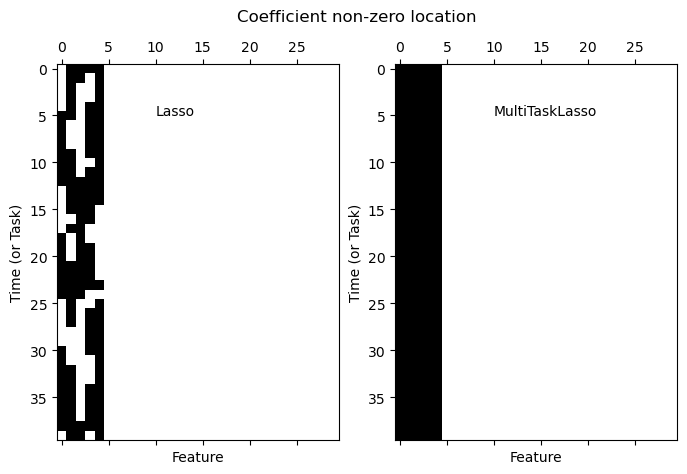

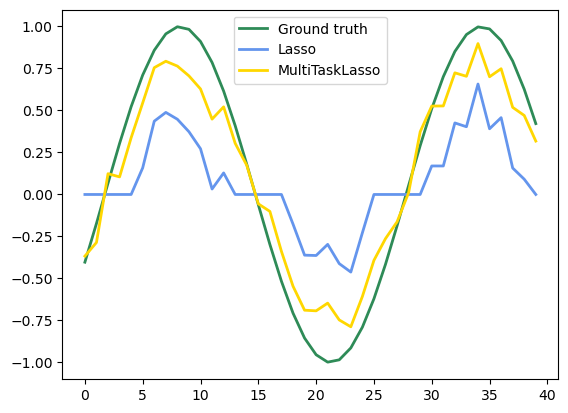

In [45]:
# plot support & time series
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.spy(coef_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "Lasso")

plt.subplot(1, 2, 2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel("Feature")
plt.ylabel("Time (or Task)")
plt.text(10, 5, "MultiTaskLasso")
fig.suptitle("Coefficient non-zero location")

feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:,        feature_to_plot], 
         color="seagreen", 
         linewidth=lw, 
         label="Ground truth")
plt.plot(coef_lasso_[:, feature_to_plot], 
         color="cornflowerblue", 
         linewidth=lw, 
         label="Lasso")
plt.plot(coef_multi_task_lasso_[:, feature_to_plot],
         color="gold",
        linewidth=lw,
        label="MultiTaskLasso")

plt.legend(loc="upper center")
plt.axis("tight")
plt.ylim([-1.1, 1.1])
plt.show()

### [Elastic-Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)
- Linear regression model trained with $\ell1$ and $\ell2$ regularization.
- Enables learning sparse models (like __Lasso__) while providing regularization features similar to __Ridge__. Controlled by `l1_ratio` parameter.
- Useful when features are correlated to each other.
- Function to minimize: $\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 + \frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$

### [example: Lasso vs Elastic Net comparison](https://scikit-learn.org/dev/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html)

In [46]:
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import enet_path, lasso_path

In [47]:
X,y = datasets.load_diabetes(return_X_y=True)
X /= X.std(axis=0) #standardize data for easier l1_ratio

In [48]:
# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
print("Computing regularization path using the positive lasso...")
print("Computing regularization path using the elastic net...")
print("Computing regularization path using the positive elastic net...")

alphas_lasso,          coefs_lasso,          _ = lasso_path(X, y, eps=eps)
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(X, y, eps=eps, 
                                                            positive=True)
alphas_enet,           coefs_enet,           _ = enet_path(X, y, eps=eps, 
                                                           l1_ratio=0.8)

alphas_positive_enet,  coefs_positive_enet,  _ = enet_path(X, y, eps=eps, 
                                                           l1_ratio=0.8, 
                                                           positive=True)

Computing regularization path using the lasso...
Computing regularization path using the positive lasso...
Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


(-1.8715612353951363,
 0.766172774144105,
 -14.885420234294255,
 28.521273290874067)

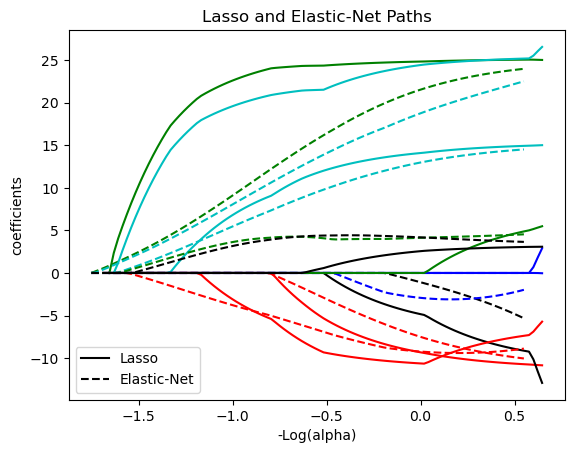

In [49]:
# plot
plt.figure(1)
colors = cycle(["b", "r", "g", "c", "k"])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet  = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and Elastic-Net Paths")
plt.legend((l1[-1], l2[-1]), ("Lasso", "Elastic-Net"), loc="lower left")
plt.axis("tight")


(-1.7698057217366772,
 0.7613272734937022,
 -14.945675764873439,
 29.78663943303696)

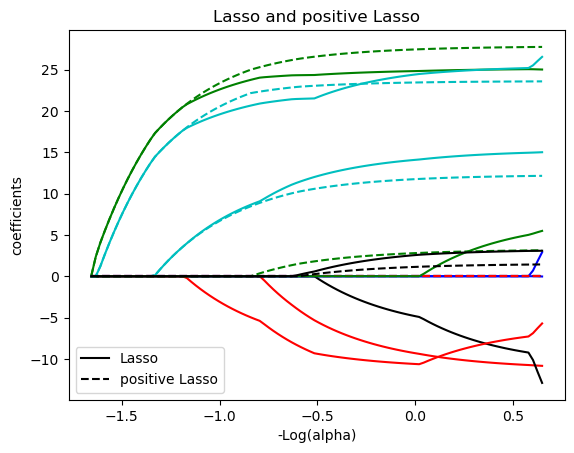

In [50]:
plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Lasso and positive Lasso")
plt.legend((l1[-1], l2[-1]), ("Lasso", "positive Lasso"), loc="lower left")
plt.axis("tight")

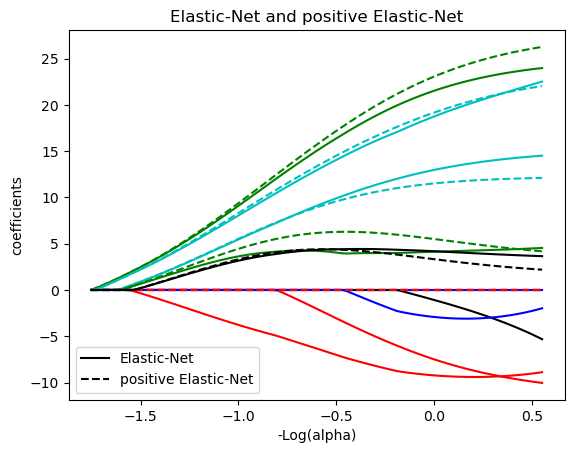

In [51]:
plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for coef_e, coef_pe, c in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle="--", c=c)

plt.xlabel("-Log(alpha)")
plt.ylabel("coefficients")
plt.title("Elastic-Net and positive Elastic-Net")
plt.legend((l1[-1], l2[-1]), ("Elastic-Net", "positive Elastic-Net"), loc="lower left")
plt.axis("tight")
plt.show()

### [Elastic-Net (Multitask)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskElasticNet.html#sklearn.linear_model.MultiTaskElasticNet)
- Estimates sparse coefficients for solving multiple regression problems. (Constraint: the selected features are the same for all regressions, aka tasks.)
- Linear model, trained with a mixed $\ell_1\ell_2$ norm and an $\ell_2$ norm for regularization.
- Function to minimize: $\min_{W} { \frac{1}{2n_{\text{samples}}} ||X W - Y||_{\text{Fro}}^2 + \alpha \rho ||W||_{2 1} +
\frac{\alpha(1-\rho)}{2} ||W||_{\text{Fro}}^2}$
- Uses *coordinate descent* as the fitting algorithm.

### [Elastic-Net (Multitask w/ Cross Validation)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.MultiTaskElasticNetCV.html#sklearn.linear_model.MultiTaskElasticNetCV)
- Uses CV to set the `alpha` and `l1_ratio` parameters.

In [52]:
# best practice: pass X & y as Fortran-contiguous numpy arrays
# to avoid unnecessary memory duplication

from sklearn import linear_model as LM

clf     = LM.MultiTaskElasticNet(alpha=0.1)
clfcv   = LM.MultiTaskElasticNetCV(cv=3)

X,y = [[0, 0], [1, 1], [2, 2]], [[0, 0], [1, 1], [2, 2]] 

clf.fit(X,y); clfcv.fit(X,y)

print(clf.coef_, clf.intercept_)
print(clfcv.coef_, clfcv.intercept_)

[[0.45663524 0.45612256]
 [0.45663524 0.45612256]] [0.0872422 0.0872422]
[[0.52875032 0.46958558]
 [0.52875032 0.46958558]] [0.00166409 0.00166409]


### [Least Angle Regression (LARS)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lars.html#sklearn.linear_model.Lars)
- Used for high-dimensional data problems - numerically efficient approach.
- Similar to fwd-stepwise regression: it finds the feature _most correlated with the target_ in each step. If multiple features have equal correlation, it proceeds in a direction _equiangular between the features_.
- Same computational complexity as OLS.
- Returns a _[full piecewise solution path](https://en.wikipedia.org/wiki/Piecewise)_ - useful for cross-validation & tuning.
- Given that it relies on iterative refits of the residuals, LARS can be sensitive to noise.
- Low-level implementations: [lars_path](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lars_path.html#sklearn.linear_model.lars_path) and [lars_path_gram](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.lars_path_gram.html#sklearn.linear_model.lars_path_gram).

In [53]:
reg = LM.Lars(n_nonzero_coefs=1)

reg.fit([[-1,1],  [0, 0], [1, 1]], 
         [-1.1111, 0,     -1.1111])

print(reg.coef_)

[ 0.     -1.1111]


### [LARS Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html#sklearn.linear_model.LassoLars)
- Unlike "normal" LARS, this yields an exact solution.
- Similar to fwd-stepwise regression, but the coefficients are increased in a direction that is *equiangular to each one's correlations with the residual*.
- Instead of returning a vector, LARS returns a curve representing the solution for each value of the $\ell_1$ norm of the parameter vector.
- `coef_path_` (n_features, max_features+1) contains the coefficients path. The first column is always zero.

In [54]:
from sklearn import linear_model as LM
reg = LM.LassoLars(alpha=.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
reg.coef_

array([0.6, 0. ])

### [example: Lasso path vs regularization using LARS](https://scikit-learn.org/dev/auto_examples/linear_model/plot_lasso_lars.html#sphx-glr-auto-examples-linear-model-plot-lasso-lars-py)
- Diabetes dataset.
- Each color = a different feature of the coefficients vector & is plotted vs regularization.

.

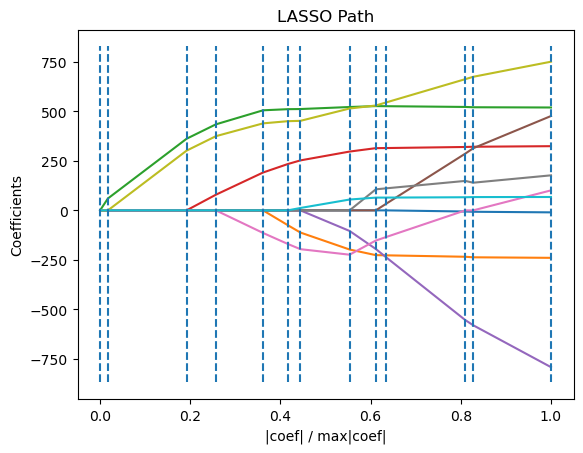

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model as LM

X, y = datasets.load_diabetes(return_X_y=True)

_, _, coefs = LM.lars_path(X, y, method="lasso", verbose=True)
xx          = np.sum(np.abs(coefs.T), axis=1)
xx         /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.show()

### [Orthogonal Matching Pursuit (OMP)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.OrthogonalMatchingPursuit.html#sklearn.linear_model.OrthogonalMatchingPursuit)
- A feature-fwd selection mechanism, similar to LARS.
- Constrains the _number of non-zero coefficients_ (ie the $\ell_0$ pseudo-norm.
- OMP can alternatively target a *specific error* instead of focusing on non-zero coefficients.

### [Example: Sparse signal recovery from a noisy measurement with OMP](https://scikit-learn.org/dev/auto_examples/linear_model/plot_omp.html#sphx-glr-auto-examples-linear-model-plot-omp-py)

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_sparse_coded_signal as MSCS
from sklearn.linear_model import OrthogonalMatchingPursuit as OMP
from sklearn.linear_model import OrthogonalMatchingPursuitCV as OMPCV

n_components, n_features = 512, 100
n_nonzero_coefs = 17

In [57]:
# generate dataset
y, X, w = MSCS(
    n_samples=1,
    n_components=n_components,
    n_features=n_features,
    n_nonzero_coefs=n_nonzero_coefs,
    random_state=0)
X = X.T

(idx,) = w.nonzero()

# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

<StemContainer object of 3 artists>

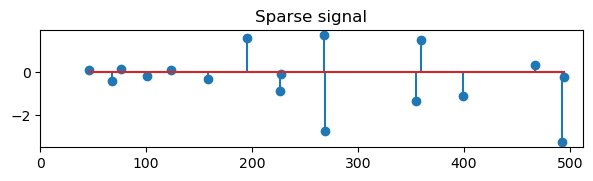

In [58]:
# plot the sparse signal
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx])

<StemContainer object of 3 artists>

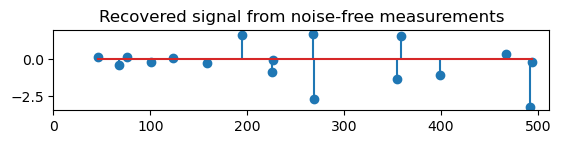

In [59]:
# plot the noise-free reconstruction
omp = OMP(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r])

<StemContainer object of 3 artists>

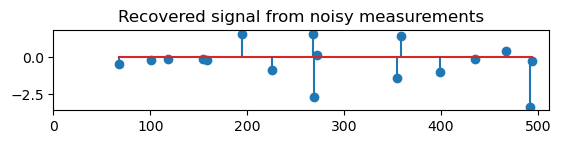

In [60]:
# plot the noisy reconstruction
omp.fit(X, y_noisy)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r])

<StemContainer object of 3 artists>

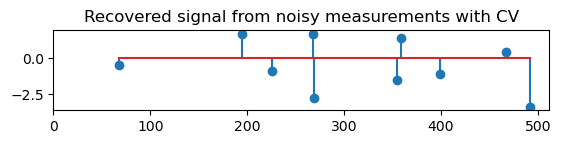

In [61]:
# plot the noisy reconstruction with number of non-zeros set by CV
omp_cv = OMPCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r])

### [Bayesian Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge)
- Can be used to add "tuned" (to the data) regularization parameters.
- The prior for coefficient $w$ is given by a spherical Gaussian model: $p(w|\lambda) =
\mathcal{N}(w|0,\lambda^{-1}\mathbf{I}_{p})$
- $w$,$\alpha$,$\lambda$ are determined during model fit; $\alpha$ and $\lambda$ are found by maximizing a *log marginal likelihood.
- initial values of the maximization procedure are set using `alpha_init` and `lambda_init`.
- Four additional params, $\alpha_1$, $\alpha_2$, $\lambda_1$, $\lambda_2$, can alter the gamma prior distributions over $\alpha$ and $\lambda$. They are usually chosen to be *non-informative*.

In [62]:
from sklearn import linear_model as LM
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [ 0.,       1.,       2.,       3.]

reg = LM.BayesianRidge(); reg.fit(X, Y)
print(reg.predict([[1,0]]))
print(reg.coef_)

[0.50000013]
[0.49999993 0.49999993]


### [Example: Bayesian Ridge Regression - curve fitting](https://scikit-learn.org/dev/auto_examples/linear_model/plot_bayesian_ridge_curvefit.html#sphx-glr-auto-examples-linear-model-plot-bayesian-ridge-curvefit-py)
- Fitting a polynomial curve with BRR is dependent on __initial__ values of `alpha` and `lambda`.
- This example: sinusoid approximated by polynomial w/ different pairs of initial values. Defaults are `alpha_init=1.90`, `lambda_init=1.0` - so resulting curve bias is large.

In [63]:
# sinusoidal data - with noise
import numpy as np
def func(x):
    return np.sin(2 * np.pi * x)

size    = 25
rng     = np.random.RandomState(1234)
x_train = rng.uniform(0.0, 1.0, size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test  = np.linspace(0.0, 1.0, 100)

In [64]:
# fit by cubic polynomial
# np.vander = generate a Vendermode matrix.
from sklearn.linear_model import BayesianRidge as BR

n_order = 3
X_train = np.vander(x_train, n_order+1, increasing=True)
X_test  = np.vander(x_test,  n_order+1, increasing=True)
reg     = BR(tol=1e-6, fit_intercept=False, compute_score=True)

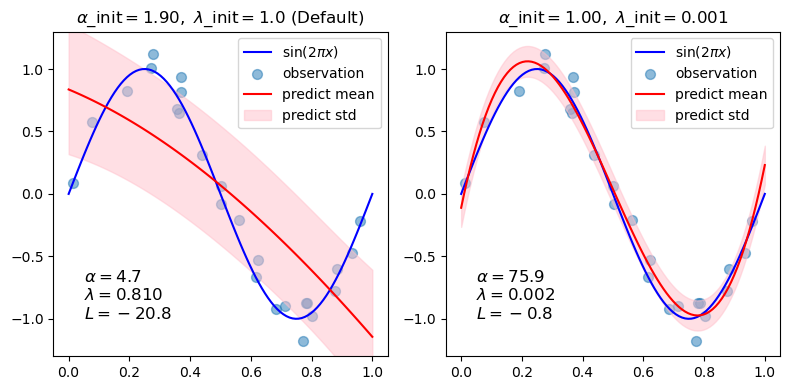

In [65]:
# plot true & predicted curves with log marginal likelihood
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.0]  # Default values
    elif i == 1:
        init = [1.0, 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
        
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)

    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(
        x_test, 
        ymean - ystd, 
        ymean + ystd, 
        color="pink", 
        alpha=0.5, 
        label="predict std")
    ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
        reg.alpha_, reg.lambda_, reg.scores_[-1])
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()

### [Auto Relevance Determination (ARD) Regression](https://scikit-learn.org/dev/modules/generated/sklearn.linear_model.ARDRegression.html#sklearn.linear_model.ARDRegression)
- Fit the weights of a regression model using an ARD prior.
- The weights are assumed to be centered elliptic Gaussian distributions. (compare to spherical Gaussian distributions used by Bayes Ridge regression.)
- Also estimates `lambda` (precisions of the weight distributions) and `alpha` (precision of the noise distribution).
- Estimation is done with an iterative procedure (Evidence Maximization)

### [example: ARD vs Bayesian Ridge regression](https://scikit-learn.org/dev/auto_examples/linear_model/plot_ard.html#sphx-glr-auto-examples-linear-model-plot-ard-py)

### Generalized Linear Regression (GLM)
- Extends linear models:
    1. Predictions are linked to a linear combination of inputs via an **inverse link function $h$**: $\hat{y}(w, X) = h(Xw).$
    2. The squared loss function is replaced by a **unit deviance $d$** from an exponential disperson model (EDM) distribution. (Choices: Normal, Poisson, Gamma, Inverse Gaussian).
- Minimization problem becomes: $\min_{w} \frac{1}{2 n_{\text{samples}}} \sum_i d(y_i, \hat{y}_i) + \frac{\alpha}{2} ||w||_2,$
    - $\alpha| is the L2 regularization penalty. The average becomes a weighted average if sample weights are provided.
- The choice of distribution depends on the use case.
    - Agriculture & weather: 
        - number of rain events per year -- Poisson
        - amount of rainfall per event -- Gamma
        - amount of rainfall per year -- Tweedie or Compound Poisson Gamma
    - Risk modeling:
        - number of claim events per year -- Poisson
        - cost per event -- Gamma
        - total cost per policyholder per year -- Tweedie or Compound Poisson Gamma
    - Predictive Maintenance:
        - number of interruptions per year -- Poisson
        - duration per interruption -- Gamma
        - total interruption time per year -- Tweedie or Compound Poisson Gamma

### GLM / [Tweedie Model Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TweedieRegressor.html#sklearn.linear_model.TweedieRegressor)
- implements a GLM to the Tweedie distribution
- Allows modeling any above distributions with appropriate `power` parameter:
    - `power=0`: Normal distribution
    - `power=1`: Poisson distribution
    - `power=2`: Gamma distribution
    - `power=3`: Inverse Gaussian distribution
- link function specified by `link`.
- `X` should be standardized before fitting to ensure equal penalty treatment across all features.

In [66]:
from sklearn.linear_model import TweedieRegressor as Tweedie
reg = Tweedie(power=1, alpha=0.5, link='log')
reg.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2])

print(reg.coef_, reg.intercept_)

[0.24631611 0.43370317] -0.7638091359123443


### Example: log-linear Poisson regression vs LSE-based regression
- ******** NOT COMPLETE YET ***********
- dataset: [French motor 3rd-party liability claims](https://www.openml.org/d/41214)
- goal: predict claim frequency for new policyholders

In [67]:
from sklearn.datasets import fetch_openml
#df = fetch_openml(data_id=41214, as_frame=True).frame; df

### Stochastic Gradient Descent (SGD)
- Simple fitting strategy, especially useful when #samples is very large.
- `partial_fit` param allows out-of-core learning.
- [Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier) offers multiple loss functions & penalties. Example: `loss="log"` fits a __logistic regression__ model; `loss="hinge"` fits a linear __Support Vector Machine__.

In [68]:
import numpy as np
from sklearn.linear_model import SGDClassifier as SGDC
from sklearn.preprocessing import StandardScaler as SS
from sklearn.pipeline import make_pipeline as MP

X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
Y = np.array([1, 1, 2, 2])

# Always scale inputs. The most convenient way is to use a pipeline.
clf = MP(SS(), SGDC(max_iter=1000, tol=1e-3)); clf.fit(X, Y)

clf.predict([[-0.8, -1]])

array([1])

In [69]:
import numpy as np
from sklearn.linear_model import SGDRegressor as SGDR
from sklearn.pipeline import make_pipeline as MP
from sklearn.preprocessing import StandardScaler as SS

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y   = rng.randn(n_samples)
X   = rng.randn(n_samples, n_features)

reg = MP(SS(), SGDR(max_iter=1000, tol=1e-3)); reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

### [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron)
- Simple classifier, suitable for large-scale learning
- No learning reate required. Not regularized.
- Model updates only on mistakes
- Training is slightly faster than SGD with hinge loss.

In [70]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X,y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0); clf.fit(X,y)
clf.score(X,y)

0.9393433500278241

### [Passive-Aggressive Algos (ref: JMLR paper)](https://jmlr.csail.mit.edu/papers/volume7/crammer06a/crammer06a.pdf)
- Targeted for large-scale learning.
- No learning rate required, but they do use regularization (parameter `c`)
- [Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html#sklearn.linear_model.PassiveAggressiveClassifier): can use `hinge` or `squared_hinge` loss parameters.
- [Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveRegressor.html#sklearn.linear_model.PassiveAggressiveRegressor): can use 'epsilon_insensitive` or `squared_epsilon_insensitive` loss parameters.

In [71]:
from sklearn.linear_model import PassiveAggressiveClassifier as PAC
from sklearn.datasets import make_classification as MC

X,y = MC(n_features=4, random_state=0)
clf = PAC(max_iter=1000, random_state=0, tol=1e-3); clf.fit(X,y)

print(clf.coef_); print(clf.intercept_); print(clf.predict([[0,0,0,0]]))

[[0.26642044 0.45070924 0.67251877 0.64185414]]
[1.84127814]
[1]


In [72]:
from sklearn.linear_model import PassiveAggressiveRegressor as PAR
from sklearn.datasets import make_regression as MR

X,y = MR(n_features=4, random_state=0)
reg = PAR(max_iter=1000, random_state=0, tol=1e-3); reg.fit(X,y)

print(reg.coef_); print(reg.intercept_); print(reg.predict([[0,0,0,0]]))

[20.48736655 34.18818427 67.59122734 87.94731329]
[-0.02306214]
[-0.02306214]
